IMPORT PACKAGES

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

I) KIDNEY DISEASE PREDICTION

In [4]:
df1 = pd.read_csv("Kidney_disease.csv")
df1

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [5]:
df1.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

DATA CLEANING

Drop Unwanted Columns:

In [6]:
df1.drop(["id","rbc","pc","ba","bgr","sod","pot","pcv","wc","rc","cad","pe","ane"],axis=1,inplace = True)
df1.head()

,age,bp,sg,al,su,pcc,bu,sc,hemo,htn,dm,appet,classification
0,48.0,80.0,1.020,1.0,0.0,notpresent,36.0,1.2,15.4,yes,yes,good,ckd
1,7.0,50.0,1.020,4.0,0.0,notpresent,18.0,0.8,11.3,no,no,good,ckd
2,62.0,80.0,1.010,2.0,3.0,notpresent,53.0,1.8,9.6,no,yes,poor,ckd
3,48.0,70.0,1.005,4.0,0.0,present,56.0,3.8,11.2,yes,no,poor,ckd
4,51.0,80.0,1.010,2.0,0.0,notpresent,26.0,1.4,11.6,no,no,good,ckd


Check Missing Values:

In [7]:
df1.isnull().sum()

age                9
bp                12
sg                47
al                46
su                49
pcc                4
bu                19
sc                17
hemo              52
htn                2
dm                 2
appet              1
classification     0
dtype: int64

In [9]:
df1.replace("?", np.nan, inplace=True)

In [10]:
df1.dropna(inplace=True)

In [11]:
df1.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
pcc               0
bu                0
sc                0
hemo              0
htn               0
dm                0
appet             0
classification    0
dtype: int64

In [12]:
# object column encoding

df1.select_dtypes(include= "object")

,pcc,htn,dm,appet,classification
0,notpresent,yes,yes,good,ckd
1,notpresent,no,no,good,ckd
2,notpresent,no,yes,poor,ckd
3,present,yes,no,poor,ckd
4,notpresent,no,no,good,ckd
...,...,...,...,...,...
395,notpresent,no,no,good,notckd
396,notpresent,no,no,good,notckd
397,notpresent,no,no,good,notckd
398,notpresent,no,no,good,notckd


In [13]:
le = LabelEncoder()

for i in df1.select_dtypes(include= "object").columns:
    df1[i] = le.fit_transform(df1[i])

In [15]:
df1.head()

,age,bp,sg,al,su,pcc,bu,sc,hemo,htn,dm,appet,classification
0,48.0,80.0,1.020,1.0,0.0,0,36.0,1.2,15.4,1,1,0,0
1,7.0,50.0,1.020,4.0,0.0,0,18.0,0.8,11.3,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,53.0,1.8,9.6,0,1,1,0
3,48.0,70.0,1.005,4.0,0.0,1,56.0,3.8,11.2,1,0,1,0
4,51.0,80.0,1.010,2.0,0.0,0,26.0,1.4,11.6,0,0,0,0


In [17]:
df1['classification'].value_counts()

classification
0    154
1    126
Name: count, dtype: int64

<Axes: xlabel='classification', ylabel='count'>

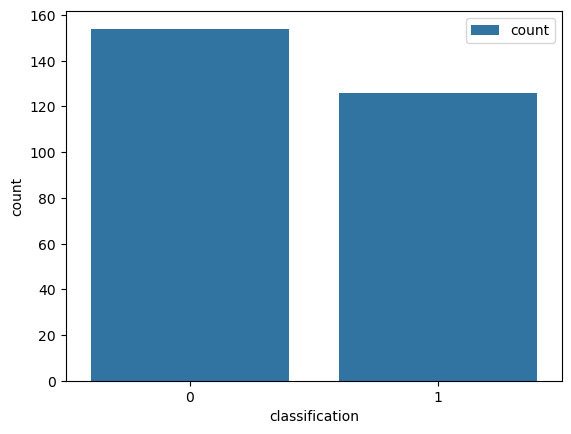

In [18]:
#Visualize the count
sns.countplot(x=df1['classification'], label="count", orient='h')

In [19]:
# Get the percentage distribution of categories
distribution = df1['classification'].value_counts(normalize=True) * 100
print(distribution)

classification
0    55.0
1    45.0
Name: proportion, dtype: float64


In [20]:
x = df1.drop(['classification'],axis = 1)

y = df1['classification']

In [21]:
x.head()

,age,bp,sg,al,su,pcc,bu,sc,hemo,htn,dm,appet
0,48.0,80.0,1.020,1.0,0.0,0,36.0,1.2,15.4,1,1,0
1,7.0,50.0,1.020,4.0,0.0,0,18.0,0.8,11.3,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,53.0,1.8,9.6,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,56.0,3.8,11.2,1,0,1
4,51.0,80.0,1.010,2.0,0.0,0,26.0,1.4,11.6,0,0,0


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=99)

In [24]:
ss = StandardScaler()

x_train = ss.fit_transform(x_train)

x_test = ss.transform(x_test)


LOGISTIC REGRESSION

In [25]:
log = LogisticRegression()
log.fit(x_train,y_train)
train_score = log.score(x_train, y_train)
#make predictions
y_pred = log.predict(x_test)

In [26]:
print('Logitic Regression  \n')
print(classification_report(y_test,y_pred))

Logitic Regression  

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.95      1.00      0.98        20

    accuracy                           0.98        56
   macro avg       0.98      0.99      0.98        56
weighted avg       0.98      0.98      0.98        56



II) LIVER DISEASE PREDICTION

In [54]:
df2 = pd.read_csv("Liver_disease.csv")
df2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [55]:
df2.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

DATA CLEANING

Check Missing Values:

In [58]:
df2.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [63]:
df2.replace("?", np.nan, inplace=True)

In [64]:
df2.dropna(inplace=True)

In [65]:
df2.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [66]:
# object column encoding

df2.select_dtypes(include= "object")

,Gender
0,Female
1,Male
2,Male
3,Male
4,Male
...,...
578,Male
579,Male
580,Male
581,Male


In [67]:
le = LabelEncoder()

for i in df2.select_dtypes(include= "object").columns:
    df2[i] = le.fit_transform(df2[i])

In [68]:
df2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [69]:
df2['Dataset'].value_counts()

Dataset
1    414
2    165
Name: count, dtype: int64

<Axes: xlabel='Dataset', ylabel='count'>

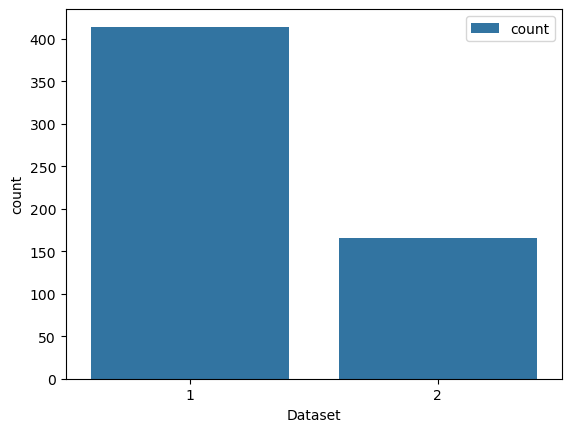

In [71]:
#Visualize the count
sns.countplot(x=df2['Dataset'], label="count", orient='h')

In [72]:
# Get the percentage distribution of categories
distribution = df2['Dataset'].value_counts(normalize=True) * 100
print(distribution)

Dataset
1    71.502591
2    28.497409
Name: proportion, dtype: float64


In [73]:
x = df2.drop(['Dataset'],axis = 1)

y = df2['Dataset']

In [74]:
x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [75]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=99)

In [77]:
ss = StandardScaler()

x_train = ss.fit_transform(x_train)

x_test = ss.transform(x_test)


LOGISTIC REGRESSION

In [78]:
log = LogisticRegression()
log.fit(x_train,y_train)
train_score = log.score(x_train, y_train)
#make predictions
y_pred = log.predict(x_test)

In [79]:
print('Logitic Regression  \n')
print(classification_report(y_test,y_pred))

Logitic Regression  

              precision    recall  f1-score   support

           1       0.74      0.92      0.82        79
           2       0.67      0.32      0.44        37

    accuracy                           0.73       116
   macro avg       0.71      0.62      0.63       116
weighted avg       0.72      0.73      0.70       116



III) PARKINSONS

In [80]:
df3 = pd.read_csv("Parkinsons.csv")
df3

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [81]:
df3.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

DATA CLEANING

Drop Unwanted Column:

In [82]:
df3.drop(["name","MDVP:Jitter(Abs)","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer(dB)","Shimmer:APQ3","MDVP:Shimmer","MDVP:APQ","Shimmer:DDA","spread1","spread2","D2"],axis=1,inplace = True)
df3.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:RAP,Shimmer:APQ5,NHR,HNR,status,RPDE,DFA,PPE
0,119.992,157.302,74.997,0.00784,0.00370,0.03130,0.02211,21.033,1,0.414783,0.815285,0.284654
1,122.400,148.650,113.819,0.00968,0.00465,0.04518,0.01929,19.085,1,0.458359,0.819521,0.368674
2,116.682,131.111,111.555,0.01050,0.00544,0.03858,0.01309,20.651,1,0.429895,0.825288,0.332634
3,116.676,137.871,111.366,0.00997,0.00502,0.04005,0.01353,20.644,1,0.434969,0.819235,0.368975
4,116.014,141.781,110.655,0.01284,0.00655,0.04825,0.01767,19.649,1,0.417356,0.823484,0.410335


Check Missing Values:

In [83]:
df3.isnull().sum()

MDVP:Fo(Hz)       0
MDVP:Fhi(Hz)      0
MDVP:Flo(Hz)      0
MDVP:Jitter(%)    0
MDVP:RAP          0
Shimmer:APQ5      0
NHR               0
HNR               0
status            0
RPDE              0
DFA               0
PPE               0
dtype: int64

In [85]:
df3['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

<Axes: xlabel='status', ylabel='count'>

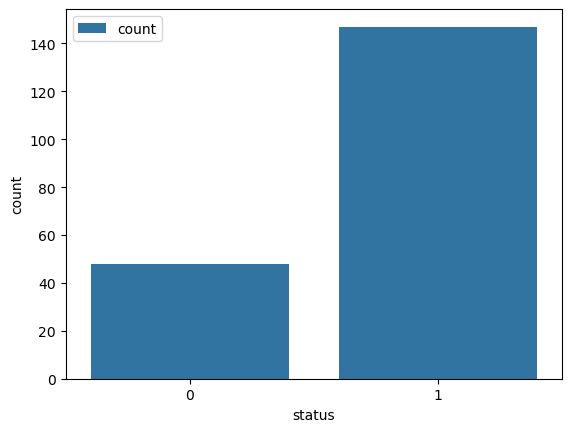

In [86]:
#Visualize the count
sns.countplot(x=df3['status'], label="count", orient='h')

In [87]:
x = df3.drop(['status'],axis = 1)

y = df3['status']

In [88]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:RAP,Shimmer:APQ5,NHR,HNR,RPDE,DFA,PPE
0,119.992,157.302,74.997,0.00784,0.00370,0.03130,0.02211,21.033,0.414783,0.815285,0.284654
1,122.400,148.650,113.819,0.00968,0.00465,0.04518,0.01929,19.085,0.458359,0.819521,0.368674
2,116.682,131.111,111.555,0.01050,0.00544,0.03858,0.01309,20.651,0.429895,0.825288,0.332634
3,116.676,137.871,111.366,0.00997,0.00502,0.04005,0.01353,20.644,0.434969,0.819235,0.368975
4,116.014,141.781,110.655,0.01284,0.00655,0.04825,0.01767,19.649,0.417356,0.823484,0.410335


In [89]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=99)

In [91]:
ss = StandardScaler()

x_train = ss.fit_transform(x_train)

x_test = ss.transform(x_test)

LOGISTIC REGRESSION

In [92]:
log = LogisticRegression()
log.fit(x_train,y_train)
train_score = log.score(x_train, y_train)
#make predictions
y_pred = log.predict(x_test)

In [93]:
print('Logitic Regression  \n')
print(classification_report(y_test,y_pred))

Logitic Regression  

              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.72      0.96      0.82        24

    accuracy                           0.74        39
   macro avg       0.79      0.68      0.68        39
weighted avg       0.77      0.74      0.72        39



RANDOM FOREST

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Make predictions
y_pred_r = model.predict(x_test)

In [95]:
print('RandomForest  \n')
print(classification_report(y_test,y_pred_r))

RandomForest  

              precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.77      1.00      0.87        24

    accuracy                           0.82        39
   macro avg       0.89      0.77      0.78        39
weighted avg       0.86      0.82      0.80        39



In [97]:
import pickle
pickle.dump(log, open('model.pkl','wb'))

In [96]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(model, file)